#Problem

AAL, a leading Australian clothing brand, is experiencing rapid growth and plans to expand further.

To make informed investment decisiowe need to identify high-revenue states and develop strategies to boost sales in lower-performing regions. Plus, analyze sales data to support the objectives.

In [74]:
import pandas as pd

In [75]:
df = pd.read_csv('/content/AusApparalSales4thQrt2020.csv')

# Data Wrangling

In [76]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [77]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [78]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


### Data understanding

**Columns**: Date, Time, State, Group, Unit, Sales

**Total Entries**: 7,560

**No Missing Values**: All columns have 7,560 non-null entries.

**Data Types**:
- Date → Object (needs conversion to datetime)
- State → Categorical(Nominal)
- Group → Categorical(Nominal)
- Time → Categorical(Ordinal, as I believe sales depends of specific time and also time follows natural order)
- Unit → Numerical (Discrete)
- Sales → Numerical (Continuous)

In [80]:
# Check for missing values
df.isna().sum()

,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


In [81]:
# Check for unique values in State columns
df['State'].unique()

array([' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS'], dtype=object)

In [82]:
# Check for unique values in Group columns
df['Group'].unique()

array([' Kids', ' Men', ' Women', ' Seniors'], dtype=object)

In [83]:
# Check for unique values in Time columns
df['Time'].unique()

array([' Morning', ' Afternoon', ' Evening'], dtype=object)

In [84]:
# Verify Date format
df['Date'].head()

,Date
0,1-Oct-2020
1,1-Oct-2020
2,1-Oct-2020
3,1-Oct-2020
4,1-Oct-2020


In [85]:
#Outlier Detection using IQR
Q1 = df[['Sales', 'Unit']].quantile(0.25)
Q3 = df[['Sales', 'Unit']].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
df_outliers = df[(df[['Sales', 'Unit']] < lower_bound) | (df[['Sales', 'Unit']] > upper_bound)].dropna()

print("Outliers detected:")
print(df_outliers)

Outliers detected:
Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


### Report

1. Missing Values Check: **No missing values found** in any column.

2. Unique Values in Categorical Columns:

 - **State**: ['WA', 'NT', 'SA', 'VIC', 'QLD', 'NSW', 'TAS']

 - **Group**: ['Kids', 'Men', 'Women', 'Seniors']

 - **Time**: ['Morning', 'Afternoon', 'Evening']

3. Date Column Format
Identified format: 1-Oct-2020
Converted to datetime format **(%d-%b-%Y)**.

4. No **Outliers** detected in the Unit & Sales
4. Recommendations for Handling Missing or Incorrect Data in future:
 - Date: Convert to datetime format (%d-%b-%Y). Fill using previous row's date (ffill), assuming sales data follows a timeline.
 - Time:Fill Unexpected categories or missing cell with mode
 - State: Trim spaces, correct using predefined valid states. Fill using mode for the same Date & Time slot.
 - Group: Fill missing values with mode, standardize using valid categories
 - Unit: Remove negatives, use IQR (Interquartile Range) Method to handle outliers.
 - Sales: Remove negatives, use median/mean imputation for missing values, handle outliers with IQR method.

In [86]:
#Normalization of Unit & Sales Columns

from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler()

# Numerical columns for normalization
numerical_columns = ['Unit', 'Sales']

# Apply Min-Max Scaling
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verify the transformation
df[['Unit', 'Sales']].describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,0.254054,0.254054
std,0.204784,0.204784
min,0.000000,0.000000
25%,0.095238,0.095238
50%,0.190476,0.190476
75%,0.380952,0.380952
max,1.000000,1.000000


### Perform Aggregation to Extract Insights

In [88]:
# 1. Total Sales per State
state_sales = df.groupby('State')['Sales'].sum().reset_index()

# 2. Total Sales per Customer Group
group_sales = df.groupby('Group')['Sales'].sum().reset_index()

# 3. Sales Trends by Time of Day
time_sales = df.groupby('Time')['Sales'].sum().reset_index()

# 4. Sales per State and Customer Group
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()

# 5. Sales per State and Time Slot
state_time_sales = df.groupby(['State', 'Time'])['Sales'].sum().reset_index()

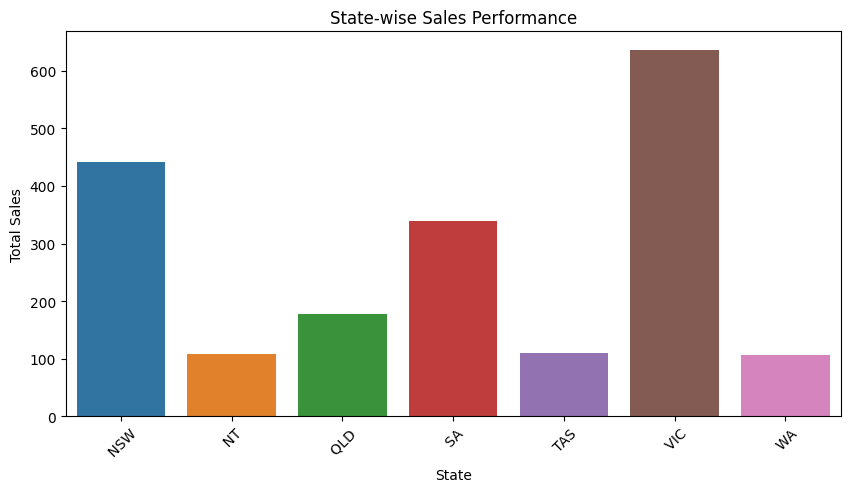

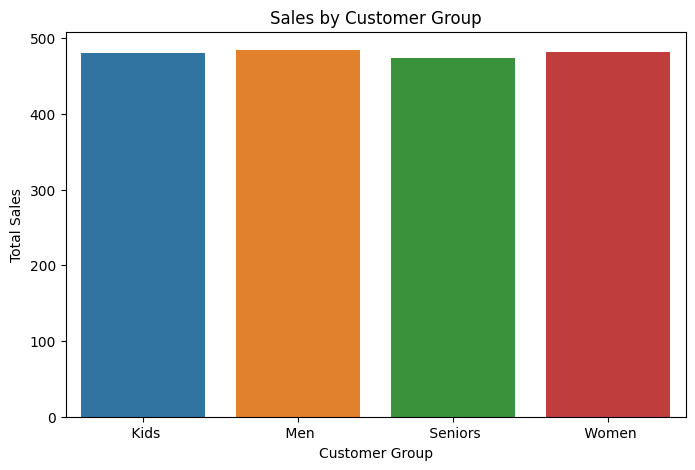

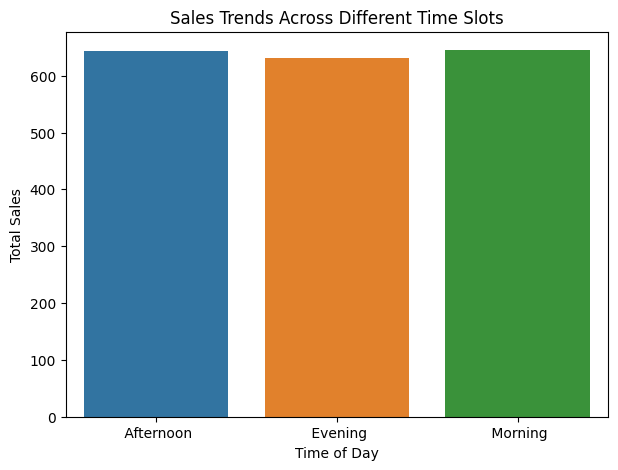

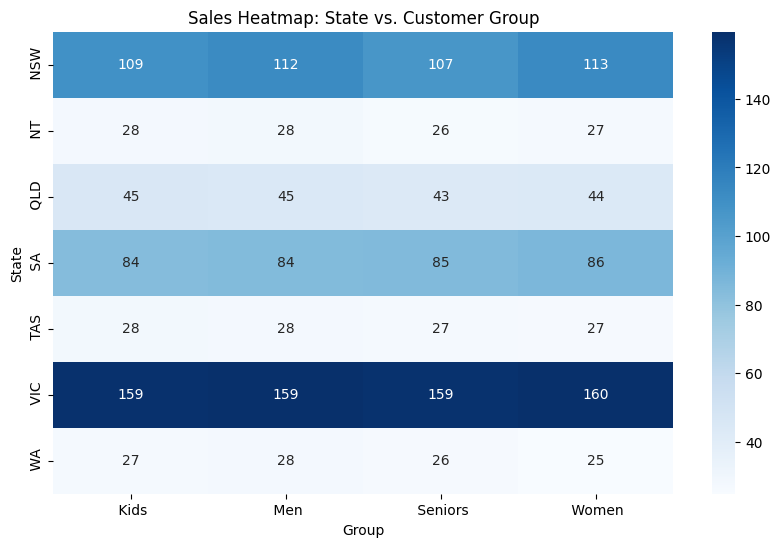

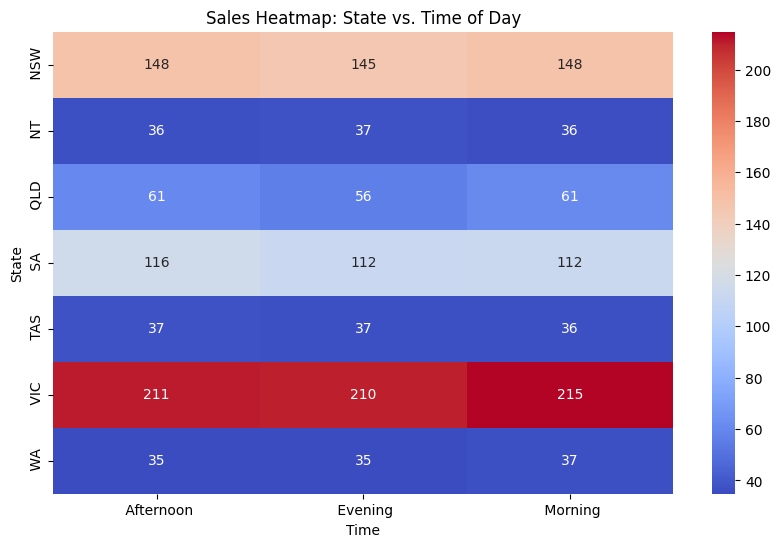

In [89]:
# Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Total Sales per State
plt.figure(figsize=(10, 5))
sns.barplot(x=state_sales['State'], y=state_sales['Sales'], hue=state_sales['State'])
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("State-wise Sales Performance")
plt.xticks(rotation=45)
plt.show()

# 2. Total Sales per Customer Group
plt.figure(figsize=(8, 5))
sns.barplot(x=group_sales['Group'], y=group_sales['Sales'], hue=group_sales['Group'])
plt.xlabel("Customer Group")
plt.ylabel("Total Sales")
plt.title("Sales by Customer Group")
plt.show()

# 3. Sales Trends by Time of Day
plt.figure(figsize=(7, 5))
sns.barplot(x=time_sales['Time'], y=time_sales['Sales'], hue=time_sales['Time'])
plt.xlabel("Time of Day")
plt.ylabel("Total Sales")
plt.title("Sales Trends Across Different Time Slots")
plt.show()

# 4. Sales per State and Customer Group
pivot_group = state_group_sales.pivot(index="State", columns="Group", values="Sales")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_group, annot=True, fmt=".0f", cmap="Blues")
plt.title("Sales Heatmap: State vs. Customer Group")
plt.show()

# 5. Sales per State and Time Slot
pivot_time = state_time_sales.pivot(index="State", columns="Time", values="Sales")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_time, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Sales Heatmap: State vs. Time of Day")
plt.show()

## Sales Performance Summary Report

### Total Sales per State:
- The highest sales were recorded in Victoria (VIC) with 635.97 units, followed by New South Wales (NSW) with 441.71 units.
- The lowest sales were in Western Australia (WA) with 106.37 units and Northern Territory (NT) with 109.08 units.

This indicates that VIC and NSW are the key revenue-generating states, while WA and NT may require targeted sales strategies.

### Sales per Customer Group
There is no major disparity between different customer segments, and all groups contribute significantly to overall sales.

### Sales Trends by Time of Day
- There is slightly higher sales activity in the morning, suggesting early shopping trends.
- Afternoon and evening sales are also strong, indicating steady consumer engagement throughout the day.
### Sales per State and Customer Group
- VIC and NSW lead across all customer groups, with each segment recording over 100 units in sales.
- SA shows strong performance, with sales across all groups exceeding 80 units.
- WA and NT have the lowest sales across all customer groups, with figures below 30 units, indicating potential market challenges or opportunities for growth.
- Kids and Women segments tend to perform slightly better in most states, suggesting the need for targeted marketing strategies.
### Sales per State and Time Slot
- VIC dominates across all time slots, especially in the morning (214.75 units).
- NSW also sees consistent sales throughout the day, with a slight peak in the morning (148.24 units).
- States with lower sales (WA, NT, TAS) exhibit similar sales trends across all time slots, indicating that time of day may not be a strong influencing factor in these regions.
- The highest sales time slot across all states is the morning period, reinforcing consumer preference for morning shopping.

## Key Insights & Recommendations
- **Expansion Opportunities:** VIC and NSW are top-performing states, making them ideal candidates for further investment and expansion.
- **Targeted Growth Strategies:** WA, NT, and TAS exhibit lower sales across all metrics. Special marketing efforts, promotions, and localized strategies may help boost sales in these regions.
- **Time-Based Promotions:** Morning sales are slightly higher across states, indicating that early-bird discounts or morning promotions could be an effective strategy.
- **Customer Group Engagement:** Sales are fairly balanced across customer groups, meaning marketing efforts should remain inclusive rather than focusing on a single segment.

# Data Analysis

In [90]:
df = pd.read_csv('/content/AusApparalSales4thQrt2020.csv')

## Descriptive Statistical Analysis for Sales and Unit Columns

In [91]:
import pandas as pd
import numpy as np
from scipy import stats

# Descriptive statistics for Sales
sales_mean = df['Sales'].mean()
sales_median = df['Sales'].median()
sales_mode_result = stats.mode(df['Sales'], keepdims=True)
sales_mode = sales_mode_result.mode[0] if sales_mode_result.mode.size > 0 else None
sales_std = df['Sales'].std()

# Descriptive statistics for Unit
unit_mean = df['Unit'].mean()
unit_median = df['Unit'].median()
unit_mode_result = stats.mode(df['Unit'], keepdims=True)
unit_mode = unit_mode_result.mode[0] if unit_mode_result.mode.size > 0 else None

unit_std = df['Unit'].std()

# Print results
print("Sales Analysis:")
print(f"Mean: {sales_mean}, Median: {sales_median}, Mode: {sales_mode}, Std Dev: {sales_std}")
print("\nUnit Analysis:")
print(f"Mean: {unit_mean}, Median: {unit_median}, Mode: {unit_mode}, Std Dev: {unit_std}")

Sales Analysis:
Mean: 45013.5582010582, Median: 35000.0, Mode: 22500, Std Dev: 32253.506943966317

Unit Analysis:
Mean: 18.00542328042328, Median: 14.0, Mode: 9, Std Dev: 12.901402777586458


## Identify Groups with Highest and Lowest Sales

In [92]:
# Group-wise Sales Analysis
group_sales = df.groupby("Group")["Sales"].sum()

# Identify highest and lowest sales group
highest_sales_group = group_sales.idxmax()
lowest_sales_group = group_sales.idxmin()

print(f"Highest Sales Group: {highest_sales_group}, Sales: {group_sales.max()}")
print(f"Lowest Sales Group: {lowest_sales_group}, Sales: {group_sales.min()}")


Highest Sales Group:  Men, Sales: 85750000
Lowest Sales Group:  Seniors, Sales: 84037500


## Identify Groups with Highest and Lowest Sales

In [93]:

# Grouping data by 'Group' and summing up the sales
group_sales = df.groupby("Group")["Sales"].sum()

# Identifying the highest and lowest sales groups
highest_sales_group = group_sales.idxmax()
lowest_sales_group = group_sales.idxmin()

highest_sales_value = group_sales.max()
lowest_sales_value = group_sales.min()

# Display results
print(f"Group with Highest Sales: {highest_sales_group} - {highest_sales_value}")
print(f"Group with Lowest Sales: {lowest_sales_group} - {lowest_sales_value}")

Group with Highest Sales:  Men - 85750000
Group with Lowest Sales:  Seniors - 84037500


## Generate Weekly, Monthly, and Quarterly Reports

In [94]:
# Convert Date column to datetime
df['Date_Converted'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

In [95]:
# Set Date as index
df.set_index('Date_Converted', inplace=True)

# Weekly Report
weekly_sales = df.resample('W-SUN')['Sales'].sum()

# Monthly Report
monthly_sales = df.resample('ME')['Sales'].sum()

# Quarterly Report
quarterly_sales = df.resample('QE-DEC')['Sales'].sum()

# Display reports
print("\nWeekly Sales Report:\n", weekly_sales)
print("\nMonthly Sales Report:\n", monthly_sales)
print("\nQuarterly Sales Report:\n", quarterly_sales)



Weekly Sales Report:
 Date_Converted
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

Monthly Sales Report:
 Date_Converted
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64

Quarterly Sales Report:
 Date_Converted
2020-12-31    340302500
Freq: QE-DEC, Name: Sales, dtype: int64


## Report

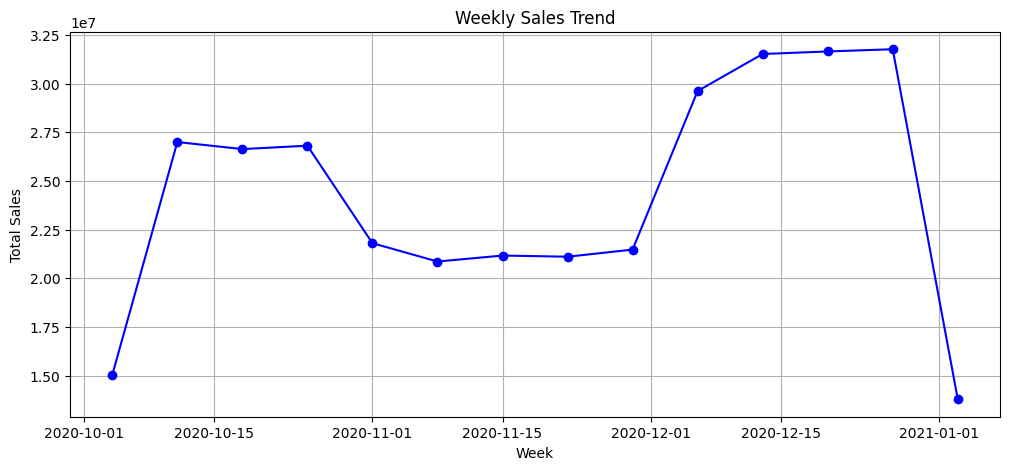

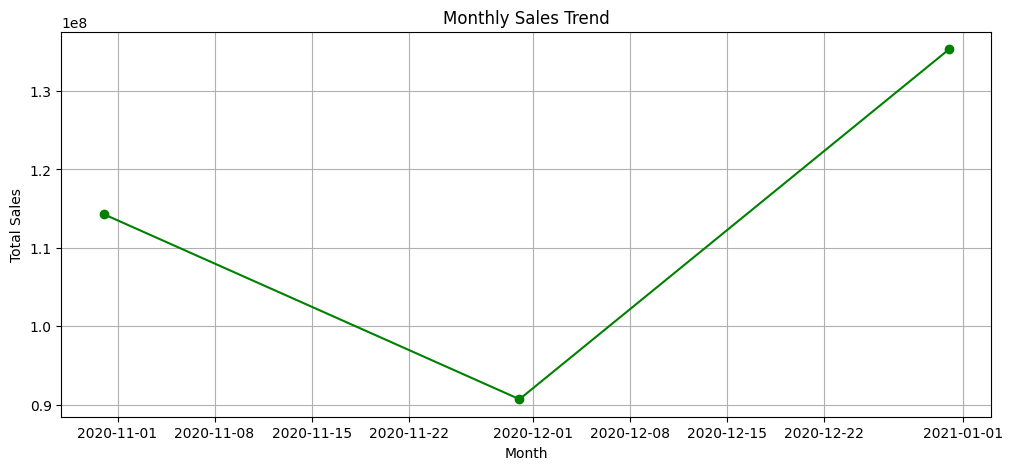

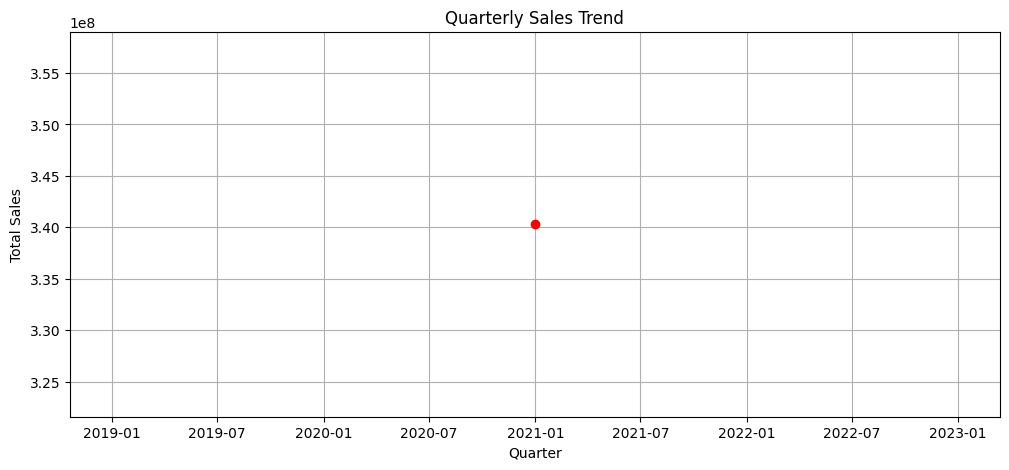

In [96]:
import matplotlib.pyplot as plt

# Plot Weekly Sales
plt.figure(figsize=(12,5))
plt.plot(weekly_sales, marker='o', linestyle='-', color='b')
plt.title("Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

# Plot Monthly Sales
plt.figure(figsize=(12,5))
plt.plot(monthly_sales, marker='o', linestyle='-', color='g')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

# Plot Quarterly Sales
plt.figure(figsize=(12,5))
plt.plot(quarterly_sales, marker='o', linestyle='-', color='r')
plt.title("Quarterly Sales Trend")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


# Data Visualization

In [97]:
df = pd.read_csv('/content/AusApparalSales4thQrt2020.csv')

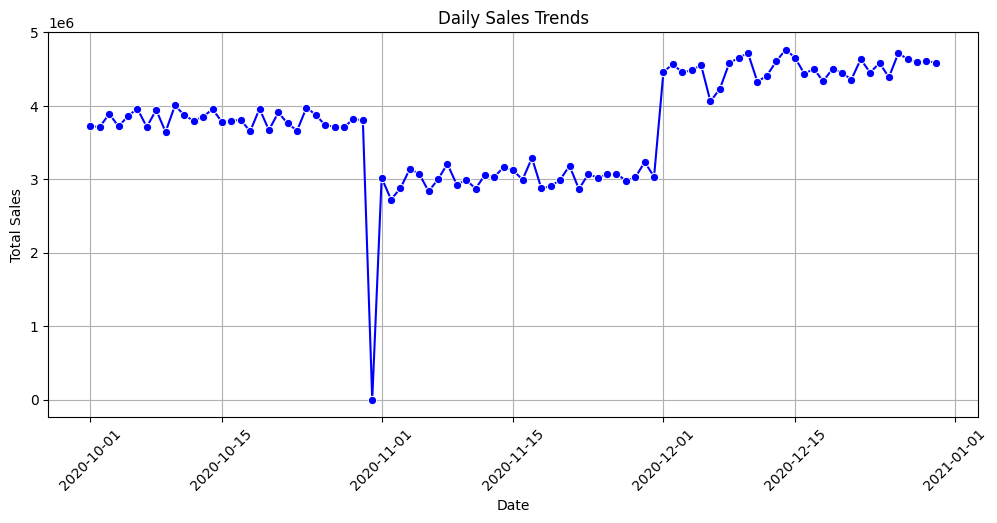

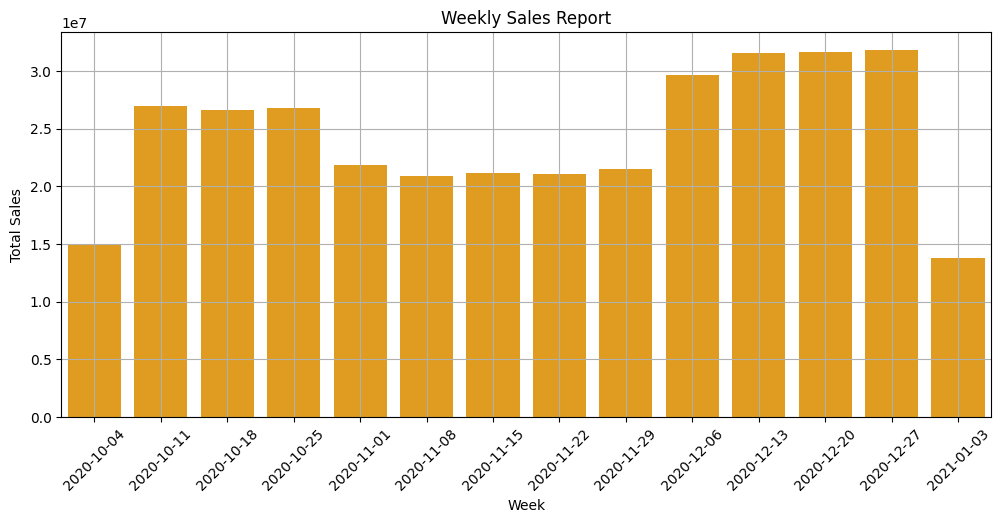

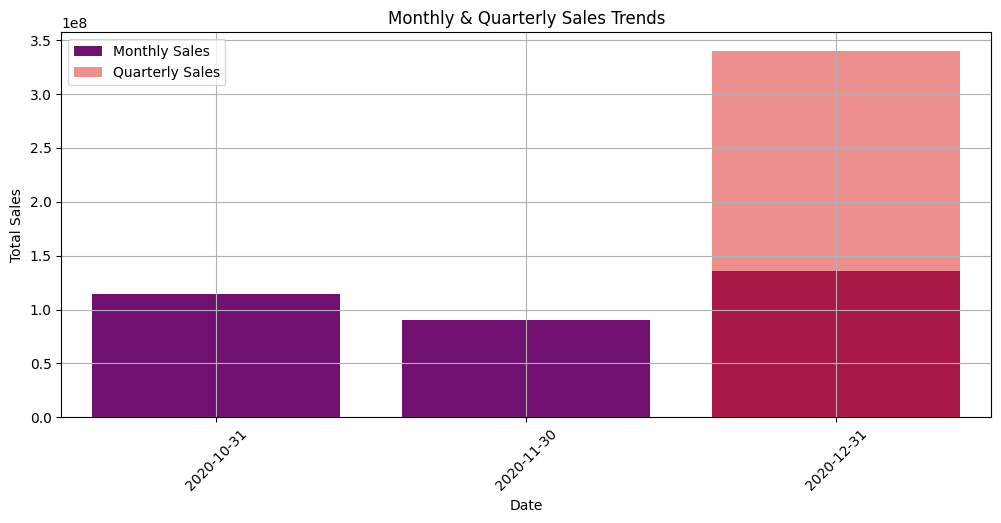

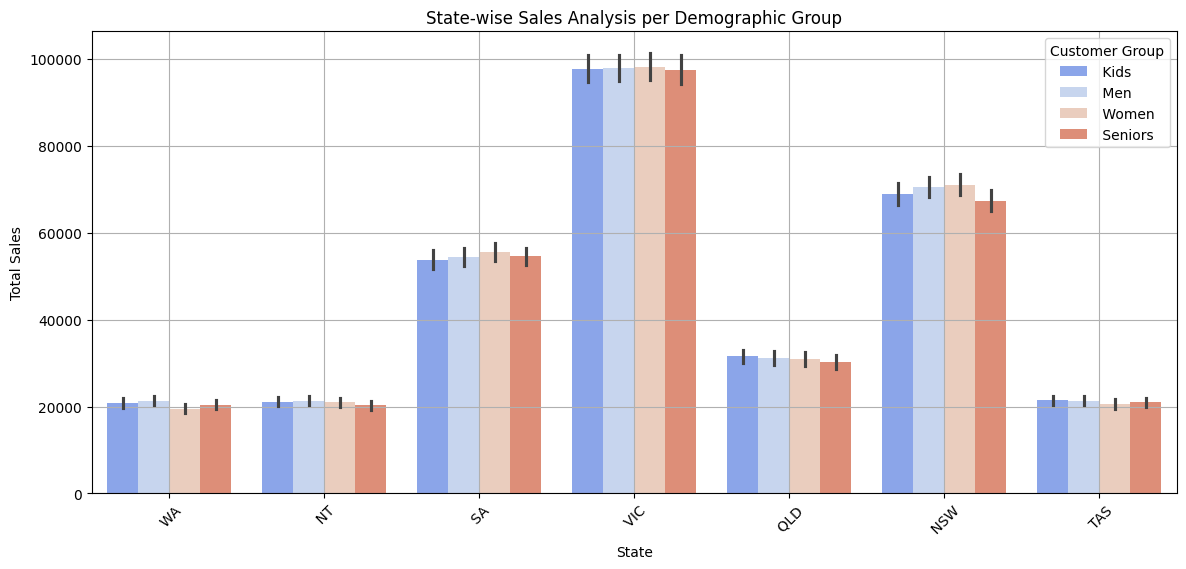

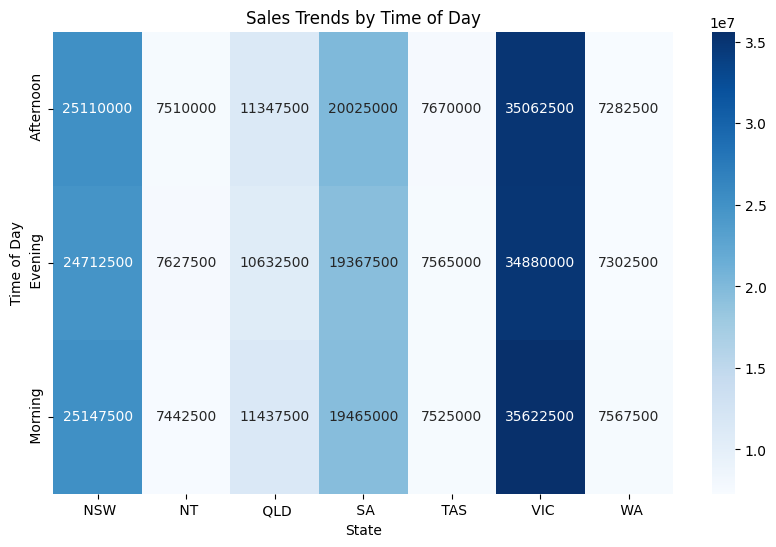

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

# Assuming 'df' contains the sales data with 'Date', 'Sales', 'State', 'Group', 'Time'
df['Date_Converted'] = pd.to_datetime(df['Date'])  # Convert to DateTime
df.set_index('Date_Converted', inplace=True)

#1. Daily Sales Trends (Line Chart)
plt.figure(figsize=(12, 5))
sns.lineplot(data=df.resample('D').sum(), x='Date_Converted', y='Sales', marker='o', color='blue')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#2. Weekly Sales Report (Bar Chart)
weekly_sales = df.resample('W-SUN')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(data=weekly_sales, x='Date_Converted', y='Sales', color='orange')
plt.title('Weekly Sales Report')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#3. Monthly & Quarterly Sales Trends (Stacked Bar Chart)
monthly_sales = df.resample('ME')['Sales'].sum().reset_index()
quarterly_sales = df.resample('QE-DEC')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(data=monthly_sales, x='Date_Converted', y='Sales', color='purple', label='Monthly Sales')
sns.barplot(data=quarterly_sales, x='Date_Converted', y='Sales', color='red', alpha=0.5, label='Quarterly Sales')
plt.title('Monthly & Quarterly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

#4. State-wise Demographic Sales Analysis (Grouped Bar Chart)
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='State', y='Sales', hue='Group', palette='coolwarm')
plt.title('State-wise Sales Analysis per Demographic Group')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Customer Group')
plt.grid()
plt.show()

#5. Time-of-the-Day Trends (Heatmap)
time_sales = df.groupby(['Time', 'State'])['Sales'].sum().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(time_sales, cmap='Blues', annot=True, fmt='.0f')
plt.title('Sales Trends by Time of Day')
plt.xlabel('State')
plt.ylabel('Time of Day')
plt.show()

#6. Interactive Dashboard (Plotly)
fig = px.bar(df.reset_index(), x="State", y="Sales", color="Group", barmode="group", title="State-wise Sales Analysis")
fig.show()


## Why Seaborn & Plotly?
- Seaborn: Ideal for statistical analysis, enhances visualization with built-in themes, and provides better readability for trends.
- Plotly: Interactive charts help drill down into specific insights (e.g., filtering by time period or customer group).
- Matplotlib: Used for foundational plots where needed
